In [69]:
import numpy as np
import pandas as pd
df=pd.read_csv("./train.csv").drop(columns=['ID', '소분류', '중분류', '대분류', '브랜드'])

In [14]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-muted')

In [86]:
df=pd.read_csv("./train.csv").drop(columns=['ID', '소분류', '중분류', '대분류', '브랜드'])
df.dropna()
df = pd.DataFrame(df)

df.set_index('제품', inplace=True)

# 칼럼 이름을 datetime 형식으로 변환
columns = df.columns
df.columns = pd.to_datetime(columns)

# Transpose
df = df.transpose()
df.head()

제품,B002-00001-00001,B002-00002-00001,B002-00002-00002,B002-00002-00003,B002-00003-00001,B002-00003-00002,B002-00003-00003,B002-00003-00004,B002-00003-00005,B002-00003-00006,...,B002-03798-00052,B002-03798-00053,B002-03798-00054,B002-03798-00055,B002-03799-00001,B002-03799-00002,B002-03799-00003,B002-03799-00004,B002-03799-00005,B002-03799-00010
2022-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-04,0,0,0,0,0,0,7,0,15,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-05,0,0,0,0,0,0,21,0,16,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df = df[['B002-00001-00001']]
df

제품,B002-00001-00001
2022-01-01,0
2022-01-02,0
2022-01-03,0
2022-01-04,0
2022-01-05,0
...,...
2023-03-31,0
2023-04-01,0
2023-04-02,0
2023-04-03,0


In [165]:
df = pd.read_csv("./train.csv").drop(columns=['ID', '소분류', '중분류', '대분류', '브랜드'])
df.set_index('제품', inplace=True)
df.columns = pd.to_datetime(df.columns)

product_code = 'B002-00001-00001'
df = df.loc[[product_code]]

columns = df.columns
df.columns = pd.to_datetime(columns)
df = df.transpose()
df.columns
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-03-26', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-01', '2023-04-02',
               '2023-04-03', '2023-04-04'],
              dtype='datetime64[ns]', length=459, freq=None)

In [166]:
df.reset_index(level=0, inplace=True)
df.rename(columns={'index': 'ds',
                   'B002-00001-00001': 'y'}, inplace=True)  # 열 이름 변경

df

제품,ds,y
0,2022-01-01,0
1,2022-01-02,0
2,2022-01-03,0
3,2022-01-04,0
4,2022-01-05,0
...,...,...
454,2023-03-31,0
455,2023-04-01,0
456,2023-04-02,0
457,2023-04-03,0


C:\Neuer Ordner\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.

C:\Neuer Ordner\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.



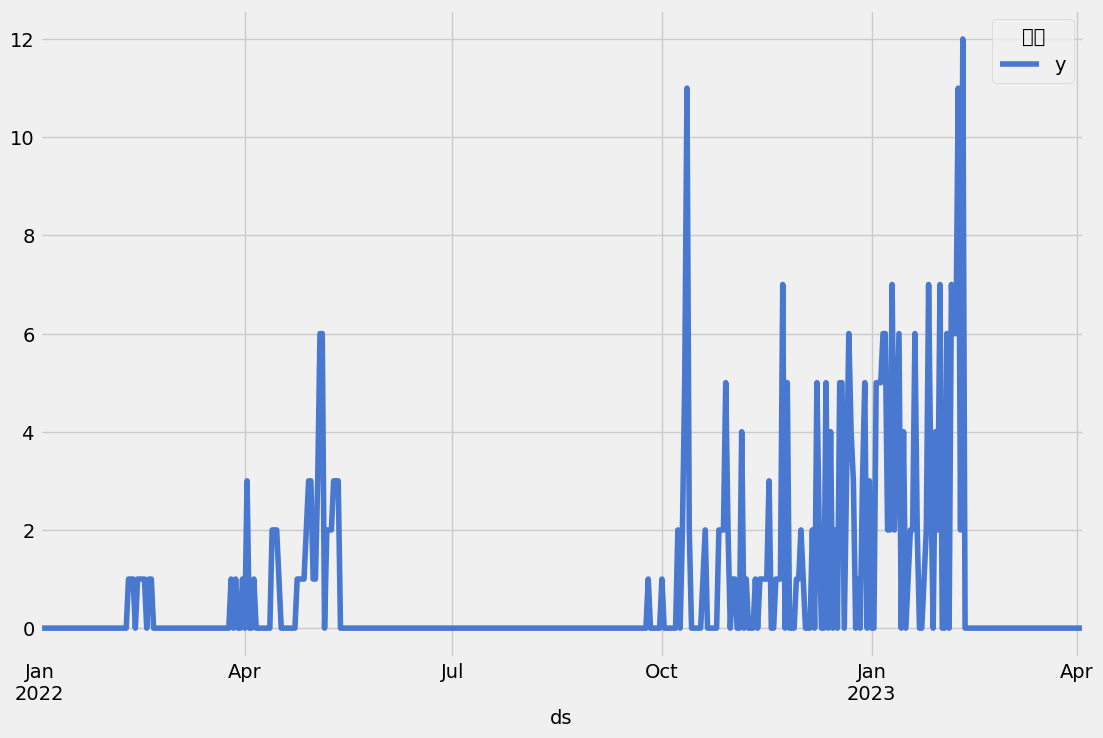

In [167]:
ax = df.set_index('ds').plot(figsize=(12, 8))
plt.show()

# cap 상한가 설정 / floor

In [195]:
# Prophet 모델 초기화
model = Prophet()

# 학습 데이터프레임 설정
model.fit(df)

# 미래 날짜 생성
future_dates = model.make_future_dataframe(periods=36, freq='D')
future_dates['cap']=8
future_dates['floor']=0
# 예측 수행
forecast = model.predict(future_dates)

# 결과 출력
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


03:33:47 - cmdstanpy - INFO - Chain [1] start processing
03:33:47 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
490 2023-05-06  1.102985   -1.118178    3.136261
491 2023-05-07  1.022131   -1.112432    3.077423
492 2023-05-08  1.018600   -1.067291    3.114844
493 2023-05-09  1.247027   -0.973894    3.162741
494 2023-05-10  1.624487   -0.559265    3.676053


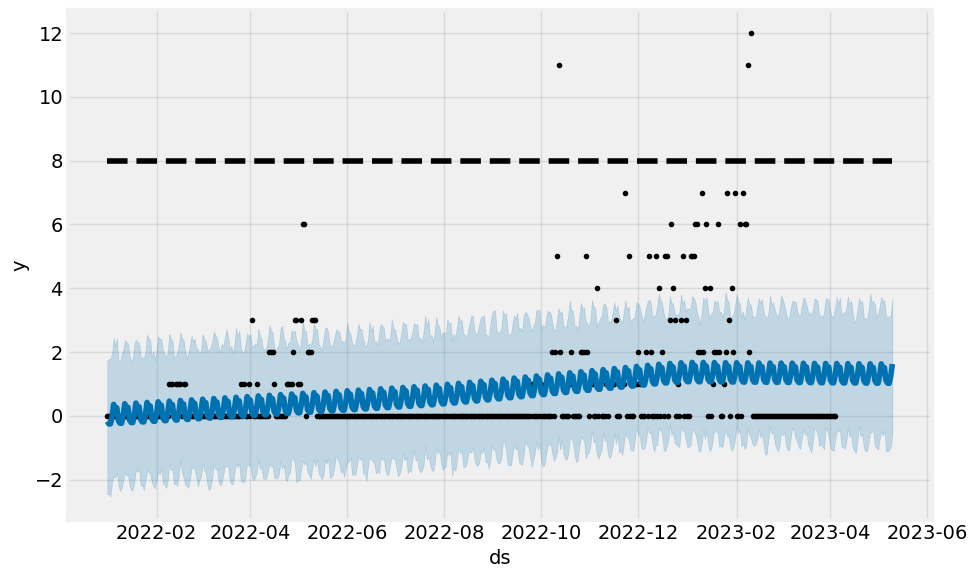

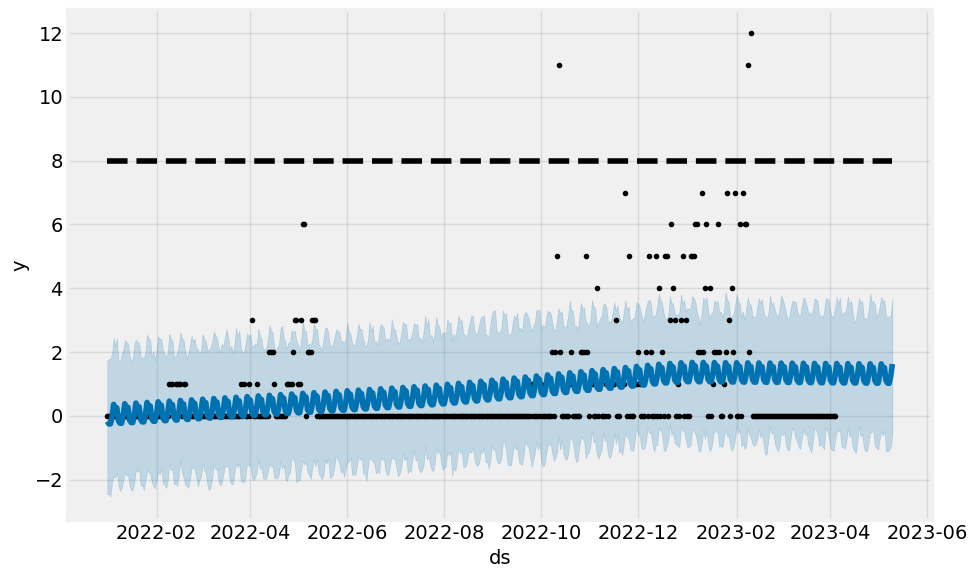

In [196]:
model.plot(forecast, uncertainty=True)

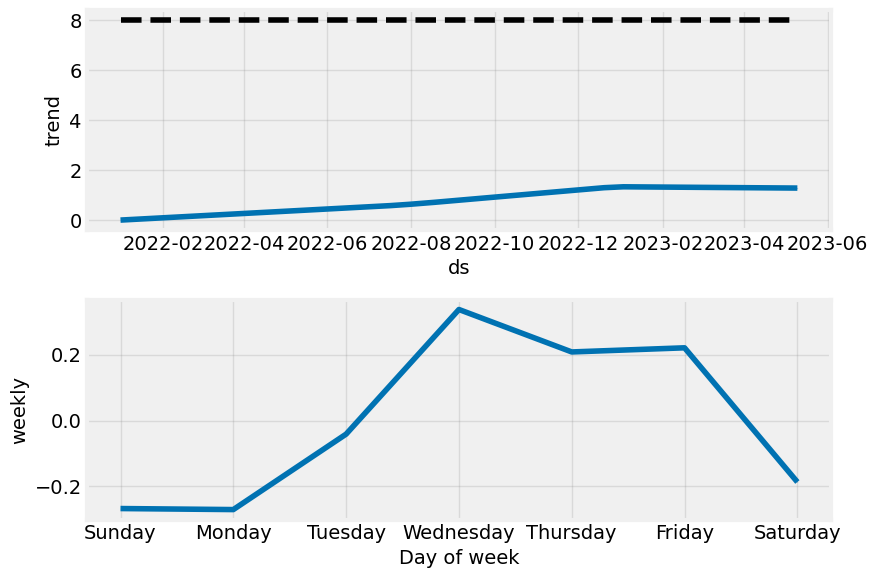

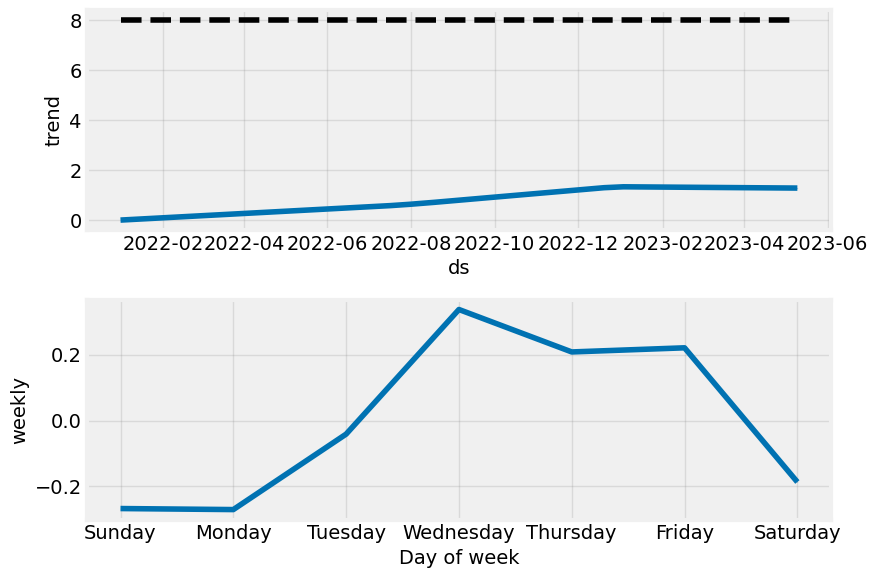

In [197]:
model.plot_components(forecast)

# 너무 유연성이 심하거나 (Overfit) 유연성이 충분하지 않은 경우 (Underfit) : changepoint

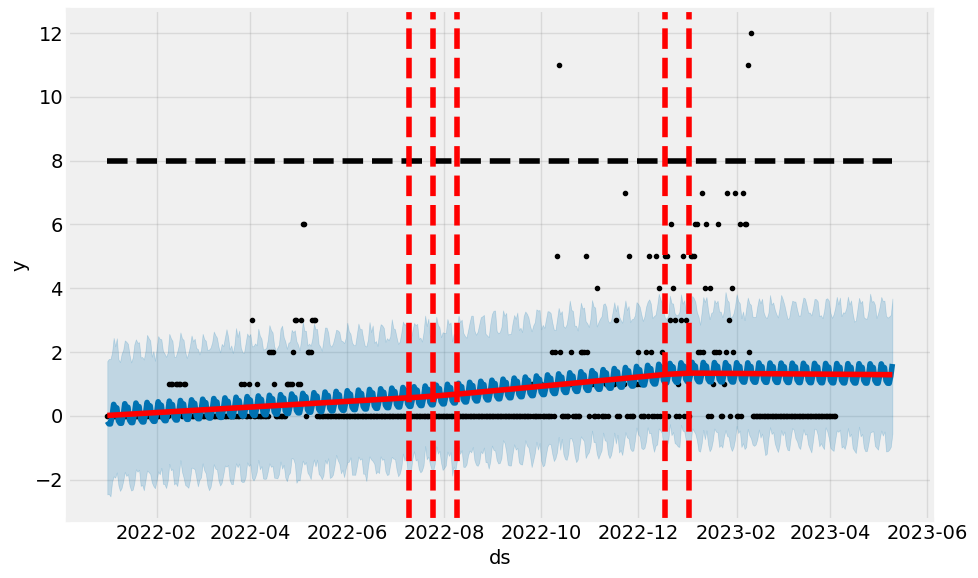

In [198]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

03:35:34 - cmdstanpy - INFO - Chain [1] start processing
03:35:34 - cmdstanpy - INFO - Chain [1] done processing


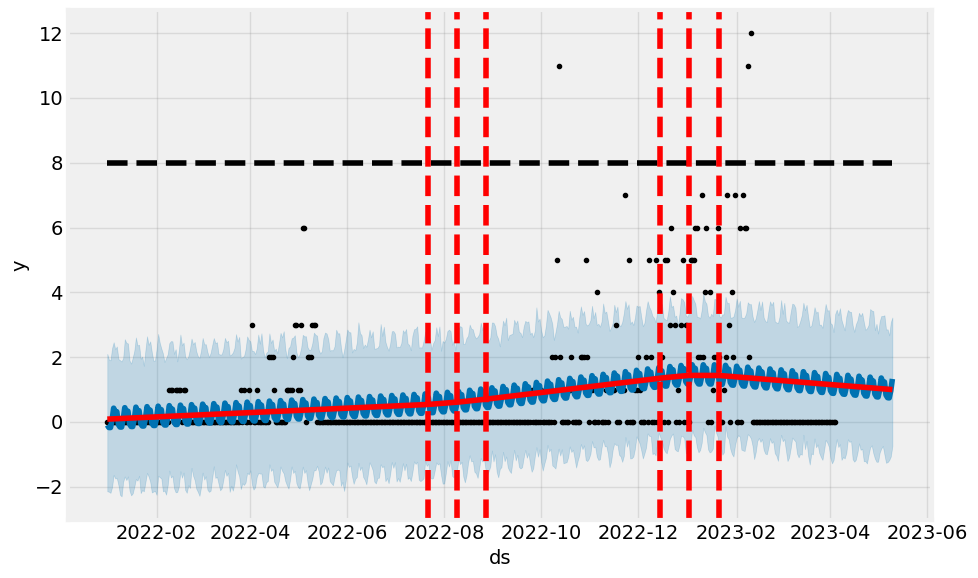

In [203]:
pro_change= Prophet(changepoint_range=1)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

03:34:44 - cmdstanpy - INFO - Chain [1] start processing
03:34:45 - cmdstanpy - INFO - Chain [1] done processing


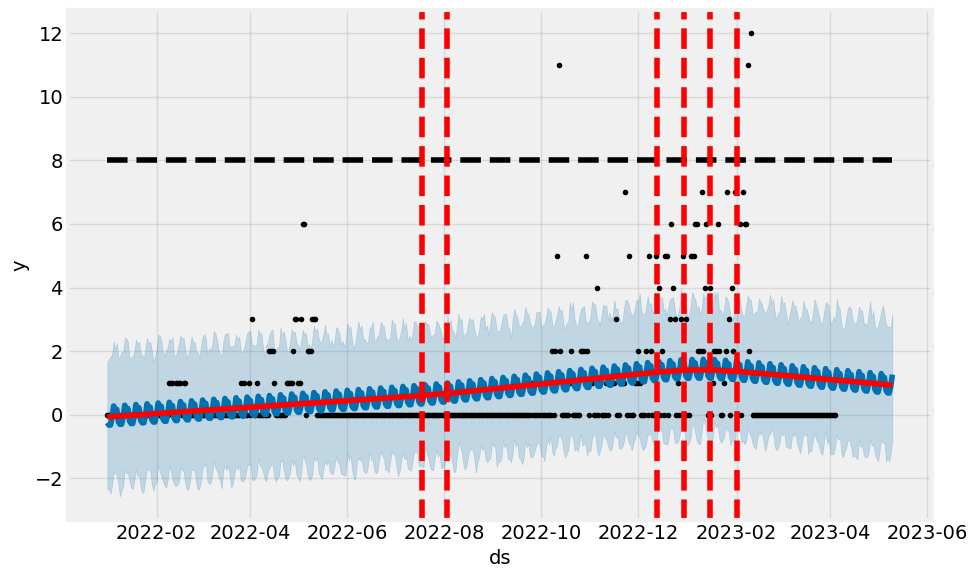

In [199]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

03:35:02 - cmdstanpy - INFO - Chain [1] start processing
03:35:02 - cmdstanpy - INFO - Chain [1] done processing


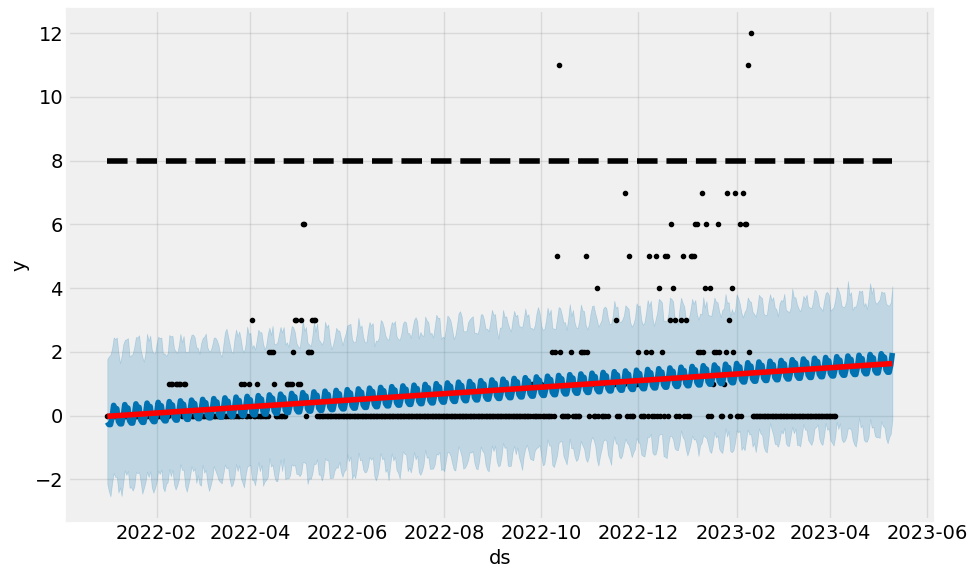

In [200]:
pro_change= Prophet(changepoint_range=0.03)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [214]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

# 교차 검증
# 초기 학습 기간 (initial)과 예측 기간 (horizon) 설정
initial = 100  # 초기 학습 기간 (일 수)
horizon = 100 # 예측 기간 (일 수)
period = 100   # 평가 간격 (일 수)

# cross_validation 함수로 교차 검증 수행
df_cv = cross_validation(model, initial=initial, horizon=horizon, period=period)

# 성능 지표 계산
df_performance = performance_metrics(df_cv)

# 결과 출력
print(df_performance)

# MAE, RMSE, MAPE 그래프로 시각화
fig_mae = plot_cross_validation_metric(df_cv, metric='mae')
fig_rmse = plot_cross_validation_metric(df_cv, metric='rmse')
fig_mape = plot_cross_validation_metric(df_cv, metric='mape')


Seasonality has period of 7 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/458 [00:00<?, ?it/s]

Exception: Less than two datapoints before cutoff. Increase initial window.